In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
spam_df = pd.read_csv('SMSSpamCollection', delimiter='\t',header=None)
spam_df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
print ('Number of spam messages:', spam_df[spam_df[0] == 'spam'][0].count())
print ('Number of ham messages:', spam_df[spam_df[0] == 'ham'][0].count())

Number of spam messages: 747
Number of ham messages: 4825


In [4]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(spam_df[1],spam_df[0])

In [5]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [6]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [7]:
for i, prediction in enumerate(predictions[:5]):
    print ('Prediction: {}. Message: {}'.format(prediction, spam_df[1][i]))
    print('_________')

Prediction: ham. Message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
_________
Prediction: ham. Message: Ok lar... Joking wif u oni...
_________
Prediction: ham. Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
_________
Prediction: ham. Message: U dun say so early hor... U c already then say...
_________
Prediction: ham. Message: Nah I don't think he goes to usf, he lives around here though
_________


[[1211    0]
 [  39  143]]


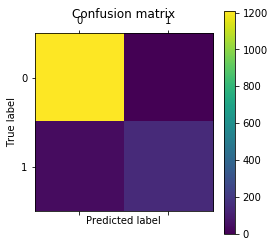

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.9720028715003589


In [10]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print(np.mean(scores), scores)

0.9538151448299572 [0.95454545 0.95334928 0.96172249 0.95215311 0.94730539]


In [11]:
precisions = cross_val_score(classifier, X_train, y_train.astype('category').cat.codes, cv=5, scoring='precision')
print('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_train, y_train.astype('category').cat.codes, cv=5, scoring='recall')
print('Recalls', np.mean(recalls), recalls)

Precision 0.987079587079587 [0.98701299 0.97435897 1.         0.97402597 1.        ]
Recalls 0.6672566371681415 [0.67256637 0.67256637 0.71681416 0.66371681 0.61061947]


In [12]:
# Models are sometimes evaluated using the F0.5 and F2 scores,

In [13]:
f1s = cross_val_score(classifier, X_train, y_train.astype('category').cat.codes, cv=5,
scoring='f1')
print('F1', np.mean(f1s), f1s)

F1 0.7957157014337289 [0.8        0.79581152 0.83505155 0.78947368 0.75824176]


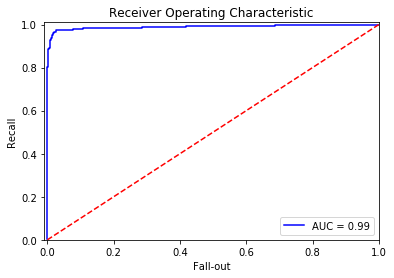

In [14]:
from sklearn.metrics import roc_curve, auc

predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test.astype('category').cat.codes,predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' %
roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score

pipeline = Pipeline([
 ('vect', TfidfVectorizer(stop_words='english')),
 ('clf', LogisticRegression())
])
parameters = {
 'vect__max_df': (0.25, 0.5, 0.75),
 'vect__stop_words': ('english', None),
 'vect__max_features': (2500, 5000, 10000, None),
 'vect__ngram_range': ((1, 1), (1, 2)),
 'vect__use_idf': (True, False),
 'vect__norm': ('l1', 'l2'),
 'clf__penalty': ('l1', 'l2'),
 'clf__C': (0.01, 0.1, 1, 10),
}

In [16]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,verbose=1, scoring='accuracy', cv=3)
df = pd.read_csv('SMSSpamCollection', delimiter='\t',header=None)
X, y, = df[1], df[0]
X_train, X_test, y_train, y_test = train_test_split(X, y)
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed: 14.1min finished


Best score: 0.982
Best parameters set:
	clf__C: 10
Accuracy: 0.9892318736539842


/Users/Chris/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1030: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['ham', 'spam'], dtype='<U4')

In [ ]:
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))